<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [6]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [7]:
df['veteran'] = np.where(df['time_spend_company'] >= 5, 1, 0).astype(int)
df.veteran = df.veteran.astype('category')
df['department'] = df['department'].astype('category')
df['salary'] = df['salary'].astype('category')
df['Work_accident'] = df['Work_accident'].astype(bool)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(bool)
df['left'] = df['left'].astype(bool)

In [8]:
Y = df['veteran'] # выбираем целевую переменную (категориальную)
X = df.drop('veteran', axis=1) # переменные для проверки влияния
X = X.drop('time_spend_company', axis=1)

In [9]:
df.drop('time_spend_company', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   Work_accident          14999 non-null  bool    
 5   promotion_last_5years  14999 non-null  bool    
 6   department             14999 non-null  category
 7   salary                 14999 non-null  category
 8   left                   14999 non-null  bool    
 9   veteran                14999 non-null  category
dtypes: bool(3), category(3), float64(2), int64(2)
memory usage: 557.3 KB


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   Work_accident          14999 non-null  bool    
 5   promotion_last_5years  14999 non-null  bool    
 6   department             14999 non-null  category
 7   salary                 14999 non-null  category
 8   left                   14999 non-null  bool    
dtypes: bool(3), category(2), float64(2), int64(2)
memory usage: 542.6 KB


In [11]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [12]:
X_processed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,False,False,True,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,False,False,True,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,False,False,True,False,False,False,False,False,False,False,True,False,True,False


In [13]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
X_processed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,False,False,True,False,False,False,False,False,False,True,False,False,True,False
1,0.780220,0.781250,0.6,0.775701,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0.021978,0.812500,1.0,0.822430,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,0.692308,0.796875,0.6,0.593458,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,0.307692,0.250000,0.0,0.294393,False,False,True,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14995,0.307692,0.187500,0.0,0.299065,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14996,0.307692,0.265625,0.0,0.219626,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14997,0.021978,0.937500,0.8,0.859813,False,False,True,False,False,False,False,False,False,False,True,False,True,False


In [14]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [15]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8342
Точность на тестовой выборке: 0.8343

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2449
           1       0.78      0.14      0.23       551

    accuracy                           0.83      3000
   macro avg       0.81      0.56      0.57      3000
weighted avg       0.83      0.83      0.78      3000



LogisticRegression(max_iter=1000)

In [16]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['float64', 'int64'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [17]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [18]:
X_processed.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889
std,0.273220,0.267452,0.246518,0.233379
min,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374
50%,0.604396,0.562500,0.400000,0.485981
75%,0.802198,0.796875,0.600000,0.696262
max,1.000000,1.000000,1.000000,1.000000


In [19]:
X_iqr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889
std,0.273220,0.267452,0.246518,0.233379
min,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374
50%,0.604396,0.562500,0.400000,0.485981
75%,0.802198,0.796875,0.600000,0.696262
max,1.000000,1.000000,1.000000,1.000000


In [20]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8163
Точность на тестовой выборке: 0.8163

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2449
           1       0.00      0.00      0.00       551

    accuracy                           0.82      3000
   macro avg       0.41      0.50      0.45      3000
weighted avg       0.67      0.82      0.73      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

⏰ Количество наблюдений не изменилось, при этом точность снизилась. Можно сделать вывод, что категориальные переменные имеют большую значимость, чем мы предполагали.

In [21]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [22]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [23]:
X_processed.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889
std,0.273220,0.267452,0.246518,0.233379
min,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374
50%,0.604396,0.562500,0.400000,0.485981
75%,0.802198,0.796875,0.600000,0.696262
max,1.000000,1.000000,1.000000,1.000000


In [24]:
X_mean.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,13917.000000,13917.000000,13917.000000,13917.000000
mean,0.611931,0.544961,0.329482,0.471300
std,0.240507,0.264966,0.217942,0.218300
min,0.032967,0.031250,0.000000,0.028037
25%,0.439560,0.296875,0.200000,0.275701
50%,0.637363,0.531250,0.400000,0.462617
75%,0.813187,0.781250,0.400000,0.668224
max,1.000000,1.000000,0.800000,0.953271


In [25]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8095
Точность на тестовой выборке: 0.8132

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2262
           1       0.52      0.05      0.09       522

    accuracy                           0.81      2784
   macro avg       0.67      0.52      0.49      2784
weighted avg       0.76      0.81      0.74      2784



LogisticRegression(max_iter=1000)

⏰ Количество наблюдений снизилось уже примерно на 1000,чем в методе на основе медианы, точность немного снижена. Можно сделать вывод, что выборка тоже не содержит важных категориальных признаков .

In [26]:
X_processed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,False,False,True,False,False,False,False,False,False,True,False,False,True,False
1,0.780220,0.781250,0.6,0.775701,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0.021978,0.812500,1.0,0.822430,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,0.692308,0.796875,0.6,0.593458,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,0.307692,0.250000,0.0,0.294393,False,False,True,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14995,0.307692,0.187500,0.0,0.299065,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14996,0.307692,0.265625,0.0,0.219626,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14997,0.021978,0.937500,0.8,0.859813,False,False,True,False,False,False,False,False,False,False,True,False,True,False


In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [28]:
# Filter - первый
# Лучше k = 4, коэф. наибольшие
selector = SelectKBest(score_func=mutual_info_classif, k = 4)
X_kbest = selector.fit_transform(X_processed, Y)

⏰ Выбрала mutual_info_classif, так как есть мысль что связь между признаками скорее всего нелинейная (матрица корреляции) и много признаков дискретных.

In [29]:
selector.scores_

array([0.03977575, 0.02352476, 0.02227938, 0.02274901, 0.00095251,
       0.00456339, 0.01143584, 0.        , 0.00065971, 0.        ,
       0.        , 0.00429961, 0.        , 0.        , 0.        ,
       0.00163056, 0.00571112, 0.00484533])

In [30]:
X_processed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years',
       'left', 'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
X_processed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,False,False,True,False,False,False,False,False,False,True,False,False,True,False
1,0.780220,0.781250,0.6,0.775701,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0.021978,0.812500,1.0,0.822430,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,0.692308,0.796875,0.6,0.593458,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,0.307692,0.250000,0.0,0.294393,False,False,True,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14995,0.307692,0.187500,0.0,0.299065,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14996,0.307692,0.265625,0.0,0.219626,False,False,True,False,False,False,False,False,False,False,True,False,True,False
14997,0.021978,0.937500,0.8,0.859813,False,False,True,False,False,False,False,False,False,False,True,False,True,False


In [32]:
selector.get_support(indices=True)

array([0, 1, 2, 3])

In [33]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours'],
      dtype='object')


In [34]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8163
Точность на тестовой выборке: 0.8163

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2449
           1       0.00      0.00      0.00       551

    accuracy                           0.82      3000
   macro avg       0.41      0.50      0.45      3000
weighted avg       0.67      0.82      0.73      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

In [35]:
# Wrapper - второй способ
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=4)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['satisfaction_level', 'last_evaluation', 'number_project', 'left'], dtype='object')


In [36]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.8383
Точность на тестовой выборке: 0.8377

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2449
           1       0.90      0.13      0.23       551

    accuracy                           0.84      3000
   macro avg       0.87      0.56      0.57      3000
weighted avg       0.85      0.84      0.78      3000



Коэффициенты модели без регуляризации: [[ 0.91093731  0.95258583  1.50625601  0.1917067   0.19554128  0.68988054
   1.06393733 -0.04338904 -0.12031997 -0.11876126  0.61195142  0.06697734
   0.02249967  0.08540285 -0.13097577 -0.17412681 -0.28744816 -0.1006838 ]]
Коэффициенты модели с регуляризацией: [[ 0.91065245  0.95028066  1.51713828  0.17107313  0.19364809  0.68241429
   1.06462335 -0.03483314 -0.11131702 -0.10868413  0.61292471  0.06058757
   0.01451108  0.08505654 -0.12776726 -0.17107282 -0.2880258  -0.10194344]]
Отобранные признаки: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years',
       'left', 'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[ 0.91045967  0.95022034  1.51714281  0.1710397   0.19364448  0.68246677
   1.06456584 -0.03492063 -0.11140863 -0.10878941  0.6127085   0.06047129
   0.01434136  0.08498107 -0.12787842 -0.17121931 -0.2880684  -0.10201408]]


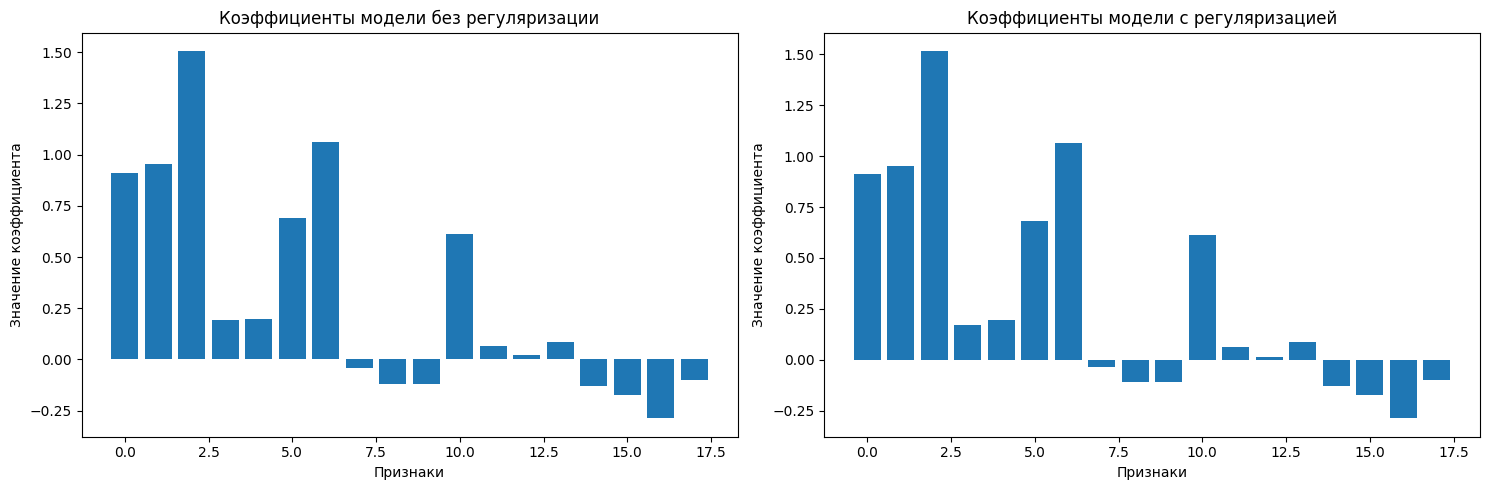

In [37]:
# Embedded - третий способ
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [38]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8342
Точность на тестовой выборке: 0.8343

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2449
           1       0.78      0.14      0.23       551

    accuracy                           0.83      3000
   macro avg       0.81      0.56      0.57      3000
weighted avg       0.83      0.83      0.78      3000



⏰ Для меня и этих данных лучше подошел второй метод для отбора данных (RFE), так как данным методом была достигнута наивысшая точность в обеих выборках, а также для понимания этот метод проще остальных.

⏰ **Основные концепции**

*Прямой отбор признаков (Forward Selection)*

Процесс начинается с пустого набора признаков. На каждом шаге добавляется признак, который наиболее улучшает производительность модели. Процесс продолжается до тех пор, пока не будет достигнуто заданное количество признаков или пока добавление новых признаков не приведет к улучшению модели.

*Обратный отбор признаков (Backward Selection)*

Процесс начинается с полного набора признаков. На каждом шаге удаляется признак, который наименее влияет на производительность модели. Процесс продолжается до тех пор, пока не останется заданное количество признаков или пока удаление дополнительных признаков не ухудшит модель.

**Основные параметры SequentialFeatureSelector**

estimator: Модель (например, LinearRegression, RandomForestClassifier), которая используется для оценки важности признаков.

n_features_to_select: Количество признаков, которые необходимо отобрать. Если не указано, остается как разница между минимальным и максимальным количеством.

direction: Направление отбора признаков. Может быть 'forward' или 'backward'.

scoring: Метрика для оценки качества модели. Если не указано, используется оценка по умолчанию для данного типа задачи.

cv: Стратегия кросс-валидации. Может быть целым числом (количество фолдов) или объектом кросс-валидатора.

verbose: Уровень детализации вывода.

n_jobs: Количество параллельных процессов для выполнения вычислений.

**Преимущества**

Интуитивность: Пошаговое добавление или удаление признаков позволяет лучше понять вклад каждого признака.

Гибкость: Можно использовать различные модели и метрики для оценки важности признаков.

Автоматизация: Позволяет автоматизировать процесс отбора признаков, что особенно полезно при большом количестве признаков.
Недостатки

Временные затраты: Последовательный подход может быть вычислительно затратным, особенно при большом количестве признаков и сложных моделях.

Локальные минимумы: Метод может застрять на локальных оптимумах и пропустить комбинации признаков, которые обеспечивают лучшую производительность.

Чувствительность к коррелированным признакам: Высокая корреляция между признаками может привести к неоднозначным результатам отбора.

In [39]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [40]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)


regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


In [41]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [108]:
# K-Fold Cross-Validation без отбора признаков
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.8293222185172835
Точности по каждому фолду: [0.825, 0.8413333333333334, 0.819, 0.828, 0.8332777592530843]


In [110]:
# K-Fold Cross-Validation после отбора признаков
# При n_splits=4 показатель средней точности наибольший
def k_fold_cross_validation(X, y, n_splits=4):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Использование на основе выборки с отобранными признаками (RFE):
k_fold_cross_validation(X = X_rfe.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.8335892060104917
Точности по каждому фолду: [0.8234666666666667, 0.8493333333333334, 0.8234666666666667, 0.8380901573753001]


⏰ Точности по фолдам варьируются от 0.8235 до 0.8493. Это показывает, что модель ведёт себя относительно стабильно на разных подвыборках данных, хотя есть небольшие отклонения.

Средняя точность K-Fold (0.8336) немного ниже средней точности до кросс-валидации (0.8383) и чуть ниже точности на всей выборке без отбора (0.834). Это может указывать на то, что предыдущие оценки могли быть завышены из-за переобучения или недостаточного разнообразия данных в обучающей выборке.

Кроме того, наибольший покаатель точности достигается при n_splits=4, при изменении этого показателя в интервале от 5 до 10, значение точности практически не изменяется.

In [112]:
# ShuffleSplit Cross-Validation до исключения выбросов
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.8289333333333333
Точности по каждому разделению: [0.825, 0.8316666666666667, 0.8296666666666667, 0.8273333333333334, 0.831]


In [113]:
# ShuffleSplit Cross-Validation после исключения выбросов
# При n_splits=7 показатель средней точности наибольший
def shuffle_split_cross_validation(X, y, n_splits=7, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Использование на основе выбори, очищенной от выбросов (IQR):
shuffle_split_cross_validation(X_iqr.to_numpy(), y_iqr.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.8174285714285714
Точности по каждому разделению: [0.816, 0.8183333333333334, 0.821, 0.8135, 0.8155, 0.8178333333333333, 0.8198333333333333]


⏰ Средняя точность 0.819 — несколько ниже, чем средняя точность K-Fold CV (0.8336) и точность без отбора признаков (0.834). Однако выше, чем точность до кросс-валидации (0.8163).

При этом наибольшая средняя точность достигается при n_splits=7, значение близко к 0.82. Диапазон точностей от 0.8135 до 0.8227. Разброс довольно небольшой, что указывает на стабильность модели при различных разбиениях данных.

In [111]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.829
Точность на тестовых данных: 0.8379166666666666


In [92]:
# Train-Test-Validation Split после отбора признаков
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X = X_rfe.to_numpy(), y = Y.to_numpy())

Точность на валидационных данных: 0.833
Точность на тестовых данных: 0.84375


⏰ Разница между валидационной и тестовой точностью небольшая, что указывает на то, что модель не переобучена. Показатели валидации и тестирования близки, что подтверждает стабильность модели. Дополнительные проверки с различными методами кросс-валидации также подтверждают это.

Делаем вывод, что модель значима и ее можно использовать. Однако важно помнить о роли категориальных переменных, так как без них модель предсказывает результат менее точно.

⏰ Для моего дата-сета наиболее подходящим будет метод K-Fold Cross-Validation, При использовании K-Fold каждый фолд будет представлять всю вариативность данных, включая категориальные переменные и выбросы.

После отбора признаков выборка стала сущетсвенно меньше, поэтому данный метод позволяет достичь наибольшей точности результата, так как каждая часть данных используется для тестирования всего 1 раз. Точность по данному методу до отбра признаков и после отличается буквально на несколько сотых, что говорит о том, что данный метод так же хорошо справился и при большем наборе данных.